The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
image shape =  (28, 28)


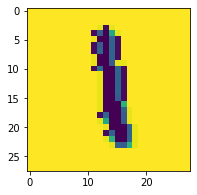

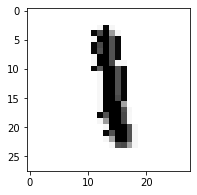

In [32]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#import torch
import numpy as np
import scipy.misc #數學工具包

from utils import load_image, save_image

%matplotlib inline 
%load_ext autoreload
%autoreload 2

image = load_image('../mnist_1.bmp')
plt.figure(figsize=(3,3)); plt.imshow((image*255).astype(np.uint8));
plt.figure(figsize=(3,3)); plt.imshow(image,cmap='gray');
print('image shape = ',image.shape)

image shape =  (28, 28)


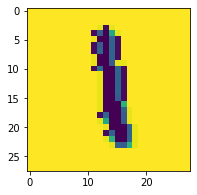

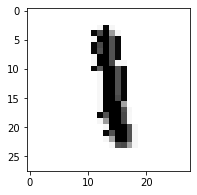

In [33]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from utils import load_image, save_image
image = load_image('../mnist_1.bmp')
plt.figure(figsize=(3,3)); plt.imshow((image*255).astype(np.uint8));
plt.figure(figsize=(3,3)); plt.imshow(image,cmap='gray');
print('image shape = ',image.shape)

In [3]:
a=1

In [4]:
#觀察 pixel
image

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.    

In [5]:
image[:,10:20]*255

array([[255., 255., 255., 255., 255., 255., 255., 255., 255., 255.],
       [255., 255., 255., 255., 255., 255., 255., 255., 255., 255.],
       [255., 255., 255., 255., 255., 255., 255., 255., 255., 255.],
       [255., 255., 246.,   8., 246., 255., 255., 255., 255., 255.],
       [255.,   7.,  73.,   0., 155., 246., 255., 255., 255., 255.],
       [255., 247.,   0.,   0.,  82.,   8., 255., 255., 255., 255.],
       [255.,   7.,  73.,   0.,  82.,   8., 255., 255., 255., 255.],
       [255.,   7.,  82.,   0.,  82.,   8., 255., 255., 255., 255.],
       [255., 247.,   0.,   0.,  82.,   8., 255., 255., 255., 255.],
       [255., 247.,   0.,   0.,  73., 247., 246., 255., 255., 255.],
       [255.,   8.,  91.,   0.,   0.,  82.,   7., 255., 255., 255.],
       [255., 255., 247.,   0.,   0.,  82.,   7., 255., 255., 255.],
       [255., 255., 247.,   0.,   0.,  82.,   7., 255., 255., 255.],
       [255., 255., 247.,   0.,   0.,  82.,   7., 255., 255., 255.],
       [255., 255., 247.,   0.,   

In [6]:
image-255

array([[-254.     , -254.     , -254.     , -254.     , -254.     ,
        -254.     , -254.     , -254.     , -254.     , -254.     ,
        -254.     , -254.     , -254.     , -254.     , -254.     ,
        -254.     , -254.     , -254.     , -254.     , -254.     ,
        -254.     , -254.     , -254.     , -254.     , -254.     ,
        -254.     , -254.     , -254.     ],
       [-254.     , -254.     , -254.     , -254.     , -254.     ,
        -254.     , -254.     , -254.     , -254.     , -254.     ,
        -254.     , -254.     , -254.     , -254.     , -254.     ,
        -254.     , -254.     , -254.     , -254.     , -254.     ,
        -254.     , -254.     , -254.     , -254.     , -254.     ,
        -254.     , -254.     , -254.     ],
       [-254.     , -254.     , -254.     , -254.     , -254.     ,
        -254.     , -254.     , -254.     , -254.     , -254.     ,
        -254.     , -254.     , -254.     , -254.     , -254.     ,
        -254.     , -254. 

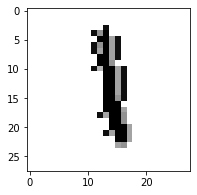

In [34]:
#檢測像素是否正錯
imageA = image.copy()
for j in range(image.shape[1]) : 
    for i in range(image.shape[0]) : 
        imageA[j][i] = imageA[j][i] + 0.5
        if imageA[j][i]<0 :imageA[j][i] = 0
        if imageA[j][i]>1 :imageA[j][i] = 1
        #print(imageA[i][j])
        
plt.figure(figsize=(3,3)); plt.imshow(imageA,cmap='gray');

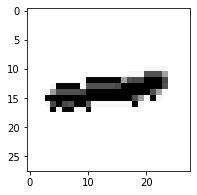

In [35]:
#旋轉
imageB = np.ones([28,28])
angle  = 270
theta  = np.pi*angle/180

rot_max_x = (imageB.shape[1] - round( 28 * np.cos(theta) - 28 * np.sin(theta) ) )/2
rot_max_y = (imageB.shape[0] - round( 28 * np.sin(theta) + 28 * np.cos(theta) ) )/2

for y in range(image.shape[1]-1) : 
    for x in range(image.shape[0]-1) : 
        new_x = round( x * np.cos(theta) - y * np.sin(theta) ) + round(rot_max_x)
        new_y = round( x * np.sin(theta) + y * np.cos(theta) ) + round(rot_max_y)
        if new_x>27 : new_x=27
        if new_y>27 : new_y=27
        if new_x<0  : new_x=0 
        if new_y<0  : new_y=0 
        #print(new_x,new_y)
        imageB[new_y][new_x] = image[y][x]
        #print(imageA[i][j])
        
plt.figure(figsize=(3,3)); plt.imshow(imageB,cmap='gray');

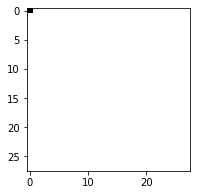

In [25]:
imageB = np.ones([28,28])
imageB[0][0]=0
plt.figure(figsize=(3,3)); plt.imshow(imageB,cmap='gray');

(7, 7)

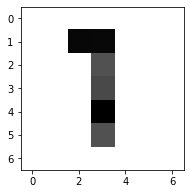

In [36]:
#縮放
scaling = 0.25
imageC = np.ones([round(28*scaling),round(28*scaling)])
for y in range(image.shape[1]) : 
    #print(y)
    for x in range(image.shape[0]) : 
        new_x = int(x*scaling)
        new_y = int(y*scaling)
        imageC[new_y][new_x] = image[y][x]
        #print(new_y)
   
    
plt.figure(figsize=(3,3)); plt.imshow(imageC,cmap='gray');
imageC.shape   

In [11]:
round(28*0.5)

14

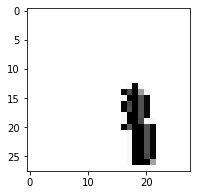

In [37]:
# 平移
t_x  = 5
t_y  = 10
imageD = np.ones([28,28])
for y in range(image.shape[1]-1) : 
    for x in range(image.shape[0]-1) : 
        new_x = round(x+t_x)
        new_y = round(y+t_y)
        if new_x>27 : new_x=27
        if new_y>27 : new_y=27
        if new_x<0  : new_x=0 
        if new_y<0  : new_y=0 
        imageD[new_y][new_x] = image[y][x]
        
plt.figure(figsize=(3,3)); plt.imshow(imageD,cmap='gray');

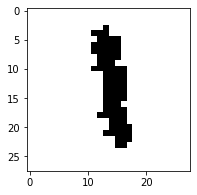

In [38]:
#BW
threshold = 128
threshold = threshold/255
image_binary = np.zeros([28,28])
for y in range(image.shape[1]) : 
    for x in range(image.shape[0]) :
        if(image[y][x]> threshold) : image_binary[y][x] = 1
        if(image[y][x]<=threshold) : image_binary[y][x] = 0  
plt.figure(figsize=(3,3)); plt.imshow(image_binary,cmap='gray');

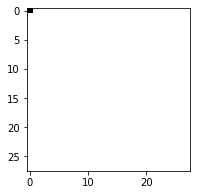

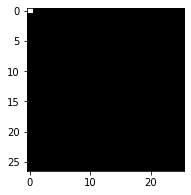

In [30]:
#Hough - pre
#BW
threshold = 
threshold = threshold/255
image_binary = np.zeros([28,28])
for y in range(image.shape[1]) : 
    for x in range(image.shape[0]) :
        if(imageB[y][x]> threshold) : image_binary[y][x] = 1
        if(imageB[y][x]<=threshold) : image_binary[y][x] = 0  
plt.figure(figsize=(3,3)); plt.imshow(image_binary,cmap='gray');


image_edge = np.ones([28,28])
for y in range(image.shape[1]-1) : 
    for x in range(image.shape[0]-2) :
        image_edge[y][x] = abs(image_binary[y][x+1] - image_binary[y][x])   
plt.figure(figsize=(3,3)); plt.imshow(image_edge[:-1,:-2],cmap='gray');

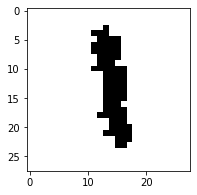

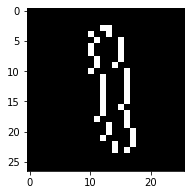

In [39]:
# edge
image_edge = np.ones([28,28])
for y in range(image.shape[1]-1) : 
    for x in range(image.shape[0]-2) :
        image_edge[y][x] = abs(image_binary[y][x+1] - image_binary[y][x])   
plt.figure(figsize=(3,3)); plt.imshow(image_binary,cmap='gray');
plt.figure(figsize=(3,3)); plt.imshow(image_edge[:-1,:-2],cmap='gray');

In [40]:
theta_max = 90
rho_max = round(np.sqrt(28**2+28**2))
acc_matrix = np.zeros([theta_max,rho_max])
acc_max_value = 0
detect_line_theta  = 0
detect_line_rho  = 0
for y in range(imageB.shape[1]-1) : 
    for x in range(imageB.shape[0]-2) : 
        if(image_edge[y][x] ==1) :
            for theta in range(theta_max):
                rho = round( y*np.cos(3.14159*(theta)/180)  +  x*np.sin(3.14159*(theta)/180))
                acc_matrix[theta][rho]=acc_matrix[theta][rho]+1 #print(theta,rho,acc_matrix[theta][rho])
                if(acc_matrix[theta][rho]>acc_max_value) :
                    acc_max_value = acc_matrix[theta][rho]
                    detect_line_theta = theta
                    detect_line_rho = rho
                    
print("最有可能角度為 : ",detect_line_theta, '最有可能半徑為 :', detect_line_rho)

最有可能角度為 :  85 最有可能半徑為 : 13


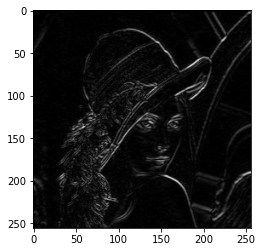

In [17]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch
import numpy as np
import scipy.misc #數學工具包

from utils import load_image, save_image
from scipy import ndimage
image = load_image('../lena_256x256.png')
gray  = image[:,:,1] 

#https://docs.scipy.org/doc/scipy/reference/ndimage.html
gray_sobel_filter = np.abs(ndimage.sobel(gray,0))
gray_prewitt_filter = np.abs(ndimage.prewitt(gray))
gray_laplace_filter = np.abs(ndimage.laplace(gray))
gray_gaussian_filter_sigma = ndimage.gaussian_filter(gray,sigma=5)  #中值濾波
gray_median_filter_size7 = ndimage.median_filter(gray, 7)  #中值濾波

plt.imshow(gray_sobel_filter,cmap='gray')